In [15]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [16]:
pwd

'C:\\Users\\ABC\\6. Datasets'

In [17]:
os.chdir('C:\\Users\\ABC\\6. Datasets')

In [ ]:
os.listdir()

In [19]:
df = pd.read_csv('heart (1) - LogReg.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [21]:
for k in range(1,14):
    print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13


In [70]:
results = []
for k in range(333,340):
    for l in range(1,14):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=k)
        ss = StandardScaler()
        x_train_ss = ss.fit_transform(x_train)
        x_test_ss = ss.transform(x_test)
        pca = PCA(n_components=l)
        x_train_pca = pca.fit_transform(x_train_ss)
        x_test_pca = pca.transform(x_test_ss)
        lr = LogisticRegression()
        model = lr.fit(x_train_pca,y_train)
        y_predict = lr.predict(x_test_pca)
        acc = accuracy_score(y_predict, y_test)
        if acc > 0.8:
            results.append((k,l,acc))
            
df = pd.DataFrame(results, columns=("k", "l", "acc"))
a = df['acc'].idxmax()
b = df['acc'].max()

print(a,b)

18 0.9365853658536586


In [23]:
"""1.  0.9121951219512195
2.  0.848780487804878
3.  0.8585365853658536
4.  0.9073170731707317
5.  0.9121951219512195
6.  0.9170731707317074
7.  0.9121951219512195
8.  0.9073170731707317
9.  0.9219512195121952
10. 0.9121951219512195
11. 0.9365853658536586
12. 0.9365853658536586
13. 0.9317073170731708

5835 0.9365853658536586"""


'1.  0.9121951219512195\n2.  0.848780487804878\n3.  0.8585365853658536\n4.  0.9073170731707317\n5.  0.9121951219512195\n6.  0.9170731707317074\n7.  0.9121951219512195\n8.  0.9073170731707317\n9.  0.9219512195121952\n10. 0.9121951219512195\n11. 0.9365853658536586\n12. 0.9365853658536586\n13. 0.9317073170731708\n\n5835 0.9365853658536586'

In [24]:
cc = confusion_matrix(y_predict, y_test)
cc

array([[ 92,   5],
       [  8, 100]], dtype=int64)

In [25]:
print ('Actual negative:', cc[0,0])
print ('False Positive:', cc[0,1])
print ('False Negative:', cc[1,0])
print ('Actual Positive:', cc[1,1])

Actual negative: 92
False Positive: 5
False Negative: 8
Actual Positive: 100


In [26]:
ev = pca.explained_variance_
ev

array([2.81149766, 1.56612623, 1.1827142 , 1.09439632, 1.0122614 ,
       0.97558918, 0.90385407, 0.77671001, 0.74749088, 0.62027468,
       0.51254811, 0.44097806, 0.37143221])

In [27]:
cum = np.cumsum(ev)/np.sum(ev)
cum

array([0.21600531, 0.33632964, 0.42719671, 0.51127838, 0.58904968,
       0.66400348, 0.73344593, 0.79311999, 0.85054917, 0.89820442,
       0.93758311, 0.97146314, 1.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

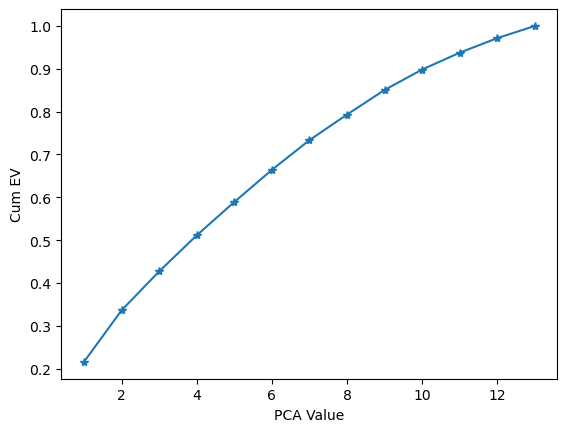

In [28]:
plt.plot(range(1,len(ev)+1), cum, marker = "*")
plt.xlabel('PCA Value')
plt.ylabel('Cum EV')
plt.show

In [29]:
threshold = 0.85
selected_pca = np.argmax(cum >= threshold) + 1
selected_pca

9